In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
ethnic_df = pd.read_csv("/content/drive/MyDrive/Representation Discrimination/data/ethnic_dataset_4893_after_removing_rakhain.csv")
ethnic_df

,Unnamed: 0,content
0,0,রমেল হত্যায় মানবাধিকার কমিশনের তদন্ত শুরুরাঙ্গ...
1,1,"নারায়ণগঞ্জের রূপগঞ্জ ও ফতুল্লা, গাজীপুরের কালি..."
2,2,গাইবান্ধার গোবিন্দগঞ্জের রংপুর চিনিকলের সাহেবগ...
3,3,চাঞ্চল্যকর পিলখানা হত্যা মামলায় ডেথ রেফারেন্স ...
4,4,অবাধে মাটি কেটে নেয়ার ধ্বংসের দ্বারপ্রান্তে ধো...
...,...,...
4888,4888,খাগড়াছড়ির দীঘিনালায় জেএসএস (এমএন লারমা) সমর্থি...
4889,4889,শান্তি-সম্প্রীতি স্থাপনে দুই দশক আগে পার্বত্য ...
4890,4890,জনপ্রিয় ম্যাগাজিন অনুষ্ঠান ‘ইত্যাদি’ আজ শুক্রব...
4891,4891,সরকারি বেতন স্কেলের নবম থেকে ১৩তম গ্রেড পর্যন্...


### Removing stopwords

In [53]:
!wget https://raw.githubusercontent.com/aljubaer/Topic-Modeling-in-Bengali/master/code/stop_words.txt

--2024-08-24 05:56:26--  https://raw.githubusercontent.com/aljubaer/Topic-Modeling-in-Bengali/master/code/stop_words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5443 (5.3K) [text/plain]
Saving to: ‘stop_words.txt’

stop_words.txt      100%[===================>]   5.32K  --.-KB/s    in 0s      

2024-08-24 05:56:26 (54.8 MB/s) - ‘stop_words.txt’ saved [5443/5443]



Upload Siyamrupali.ttf from https://www.omicronlab.com/bangla-fonts.html

In [36]:
!ls # Upload Siyamrupali.ttf from https://www.omicronlab.com/bangla-fonts.html

drive  sample_data  Siyamrupali.ttf  stop_words.txt


In [58]:
from tqdm import tqdm
stopwords_file = open('stop_words.txt', "r+", encoding = 'utf-8')
all_stopwords = stopwords_file.read()
stopwords_ready = [word.strip() for word in all_stopwords.split()]
print(stopwords_ready)

def remove_stopwords(content):
    without_stopwords = []
    for word in tqdm(content, desc="Removing stopword: "):
        if word not in stopwords_ready and len(word) > 3: #5
            without_stopwords.append(word)
    return without_stopwords

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

In [38]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def draw_plot(articles):
  text = ' '.join(articles)
  text_without_stopwords_list = remove_stopwords(text.split())
  text_without_stopwords = ' '.join(text_without_stopwords_list)
  len(text_without_stopwords)

  # Count word frequencies
  words = text_without_stopwords.split()
  word_frequencies = Counter(words)

  # Generate word cloud from word frequencies
  wordcloud = WordCloud(
      font_path='Siyamrupali.ttf',
      width=800,
      height=400,
      background_color='white'
  ).generate_from_frequencies(word_frequencies)

  # Display the word cloud
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()


Removing stopword: 100%|██████████| 2156128/2156128 [00:15<00:00, 142991.06it/s]


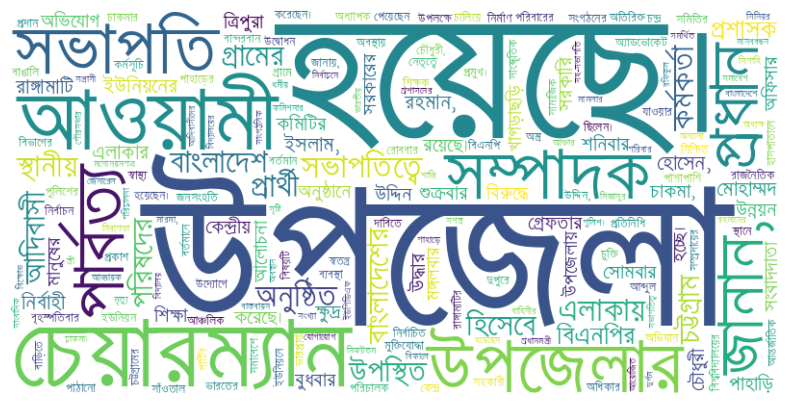

In [55]:
draw_plot(ethnic_df["content"].values.tolist())

### Per Topic - Word Cloud

In [12]:
!pip install corextopic

In [21]:
import joblib
nonethnic_articles = joblib.load("/content/drive/MyDrive/Representation Discrimination/data/nonethnic_dataset_100k.joblib")
nonethnic_articles[0]

'<p>কার্তিক শেষ হলো কাল। আজ অগ্রহায়ণের প্রথম দিন। শীতের আগমনী বার্তা এখন রাজধানীর আকাশে-বাতাসে। এমন আবহাওয়ায় গতকাল সন্ধ্যায় সেগুনবাগিচার শিল্পকলা একাডেমির জাতীয় নাট্যশালায় মিলনায়তন নিক্বণধ্বনিতে জমে উঠেছিল। এখানে শুরু হয় নয় দিনের দ্বিতীয় জাতীয় নৃত্যনাট্য উৎসব।<br />সোমবার সন্ধ্যায় শিল্পকলা একাডেমির মূল হলে উৎসবের উদ্বোধন করেন অর্থমন্ত্রী আবুল মাল আবদুল মুহিত। অর্থমন্ত্রী সমাজ রক্ষা, উন্নয়ন, মানবিক গুণাবলি বিকাশের জন্যও নৃত্যনাট্য চর্চার গুরুত্ব রয়েছে বলে মন্তব্য করেন। তিনি বলেন, ‘সংস্কৃতির নানা মাধ্যমের মধ্যে নৃত্যনাট্য একটি শক্তিশালী মাধ্যম, যা নানা শিক্ষা দেয়। এই মাধ্যম থেকে রস আস্বাদন করে আমরা সমৃদ্ধ হতে পারি।’<br />অনুষ্ঠানে বিশেষ অতিথির বক্তব্য দেন সংস্কৃতিসচিব আকতারী মমতাজ। আরও বক্তব্য দেন নাট্যব্যক্তিত্ব নাসির উদ্দীন ইউসুফ, প্রবীণ নৃত্যশিল্পী রাহিজা খানম ও বাংলাদেশ নৃত্যশিল্পী সংস্থার সভাপতি মিনু হক। সভাপতিত্ব করেন শিল্পকলা একাডেমির মহাপরিচালক লিয়াকত আলী। রাহিজা খানম সংস্কৃতি খাতে বাজেটের অপ্রতুলতার দিকটি তুলে ধরে বলেন, ‘বাজেটের জন্য আমরা অনেক ভালো কাজ করতে চেয়েও পারি না।’ তার 

In [20]:
import pandas as pd
ethnic_articles = pd.read_csv("/content/drive/MyDrive/Representation Discrimination/data/ethnic_dataset_4893_after_removing_rakhain.csv")["content"].values.tolist()
ethnic_articles[0]

'রমেল হত্যায় মানবাধিকার কমিশনের তদন্ত শুরুরাঙ্গামাটি প্রতিনিধিরাঙ্গামাটিতে পাহাড়ি ছাত্র পরিষদের (পিসিপি) নেতা রমেল চাকমার মৃত্যু নিয়ে অভিযোগ তদন্তে কার্যক্রম শুরু করেছে জাতীয় মানবাধিকার কমিশন। ঘটনাটিকে হত্যা দাবি করে নির্যাতনের কারণে রমেলের মৃত্যু হয়েছে বলে অভিযোগ করা হয়। এ ঘটনায় অভিযোগ তদন্তে তিন সদস্যের একটি কমিটি গঠন করে জাতীয় মানবাধিকার কমিশন। তদন্ত কমিটিতে জাতীয় মানবাধিকার কমিশনের সদস্য ও রাঙ্গামাটি সরকারি কলেজের সাবেক অধ্যক্ষ প্রফেসর বাঞ্চিতা চাকমাকে আহ্বায়ক, কমিশনের রাঙ্গামাটি অফিসের উপ-পরিচালক গাজী মো. সালাউদ্দিনকে সদস্যসচিব ও রাঙ্গামাটি জেলা প্রশাসনের নির্বাহী ম্যাজিস্ট্রেট অলি উজ্জামানকে সদস্য করা হয়েছে।সোনাগাজীতে অস্ত্রসহ যুবলীগ নেতা গ্রেফতারফেনী প্রতিনিধিফেনীর সোনাগাজী উপজেলার চরমজলিশপুর ইউনিয়নের কুঠিরহাটে ১টি বিদেশী পিস্তল ও ৪ রাউন্ড গুলিসহ যুবলীগ নেতা কামালকে গ্রেফতার করেছে পুলিশ। কামাল মজলিশপুরের আওয়ামী লীগের সাবেক সভাপতি মনজুতের রহমানের ছেলে ও ইউনিয়ন যুবলীগের সাবেক যুগ্ম-আহ্বায়ক। পুলিশ সূত্রে জানা যায়, গোপন সংবাদের ভিত্তিতে মঙ্গলবার সকাল ১১টা কুঠিরহাট বাজারে অভিযান চালি

In [16]:
stopwords_file = open('stop_words.txt', "r+", encoding='utf-8')
all_stopwords = stopwords_file.read()
stopwords = [word.strip() for word in all_stopwords.split()]

In [22]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from corextopic import corextopic as ct
import scipy.sparse as ss
import regex

def custom_analyzer(text):
    words = regex.findall(r'\w{2,}', text) # extract words of at least 2 letters
    for w in words:
        yield w

vectorizer = CountVectorizer(stop_words=stopwords, analyzer = custom_analyzer, max_features=50000, binary=True)
doc_word = vectorizer.fit_transform(ethnic_articles)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


(4893, 50000)

In [23]:
words = list(np.asarray(vectorizer.get_feature_names_out()))

In [24]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words


(4893, 48943)

In [25]:
words[10000:10020]

['কাজিম',
 'কাজিরবাগ',
 'কাজিরহাট',
 'কাজী',
 'কাজীকে',
 'কাজীপাড়া',
 'কাজীপুর',
 'কাজীপুরে',
 'কাজীর',
 'কাজীরচর',
 'কাজু',
 'কাজুবাদাম',
 'কাজুবাদামের',
 'কাজে',
 'কাজেই',
 'কাজেও',
 'কাজেম',
 'কাজের',
 'কাজেরই',
 'কাজ৬']

In [26]:
anchors_genre_mapping = {
    "Politics": ["নির্বাচন", "দল", "মন্ত্রী", "সংসদ", "ভোট", "প্রার্থী", "সরকার"],
    "Crime": ["হত্যা", "ডাকাতি", "ধর্ষণ", "মামলা", "পুলিশ", "গ্রেফতার", "জেল"],
    "International Affairs": ["জাতিসংঘ", "বৈঠক", "যুদ্ধ", "শান্তি", "চুক্তি", "কূটনীতি"],
    "Business & Economy": ["শেয়ারবাজার", "বিনিয়োগ", "মুদ্রাস্ফীতি", "ব্যাংক", "বাণিজ্য", "বাজেট"],
    "Sports": ["খেলা", "ক্রিকেট", "ফুটবল", "ম্যাচ", "স্বর্ণপদক", "প্রতিযোগিতা"],
    "Culture & Entertainment": ["সিনেমা", "নাটক", "সংগীত", "উৎসব", "নাচ", "অভিনয়"],
    "Jobs": ["নিয়োগ", "পরীক্ষা", "চাকরি", "কর্মসংস্থান", "ইন্টারভিউ"],
    "Lifestyle": ["ফ্যাশন", "খাদ্য", "ভ্রমণ", "বাড়ি", "স্বাস্থ্য", "রূপচর্চা"],
    "Health": ["রোগ", "চিকিৎসা", "হাসপাতাল", "স্বাস্থ্যবিধি", "ওষুধ", "টিকা"],
    "Environment": ["জলবায়ু", "দূষণ", "বনায়ন", "প্রাণী", "সংরক্ষণ", "নদী"],
    "Local News": ["ইউনিয়ন", "গ্রাম", "মসজিদ", "সড়ক", "উন্নয়ন", "বাজার"],
    "Education": ["পাঠ্যক্রম", "স্কুল", "পরীক্ষা", "শিক্ষার্থী", "শিক্ষক", "বিশ্ববিদ্যালয়"],
    "Technology": ["আইটি", "মোবাইল", "ইন্টারনেট", "সফটওয়্যার", "ডেটা", "প্রযুক্তি"],
    "Religion": ["ইসলাম", "মসজিদ", "ধর্ম", "পূজা", "উপাসনা", "ধর্মপ্রচার"],
    "Science": ["গবেষণা", "বিজ্ঞানী", "আবিষ্কার", "প্রযুক্তি", "মহাকাশ", "পরিবেশ"],
    "Protests and Social Movements": ["বিক্ষোভ", "ধর্মঘট", "আন্দোলন", "মানববন্ধন", "অধিকার", "পিকেটিং"],
    "Government Actions": ["নীতি", "উন্নয়ন", "বাজেট", "প্রকল্প", "আইন", "প্রশিক্ষণ"]
}

In [27]:
anchors = anchors_genre_mapping.values()
corex_model = ct.Corex(n_hidden=50, seed=1)
corex_model.fit(doc_word, words=words, anchors=anchors, anchor_strength=3, docs=nonethnic_articles)

In [28]:
corex_model.tc

161.6032669900766

In [29]:
top_docs = corex_model.get_top_docs(n_docs=20000, sort_by="tc")
THRESHOLD = 25.0
docs_per_topic = []
total_docs = 0
for topic_n, top_docs in enumerate(top_docs):
    docs, probs = zip(*top_docs)
    top_docs_above_threshold = [doc for doc,prob in zip(docs,probs) if prob > THRESHOLD]
    docs_per_topic.append(top_docs_above_threshold)
    total_docs += len(top_docs_above_threshold)
    print(f'Topic {topic_n}: {len(top_docs_above_threshold)}')
print(total_docs)

Topic 0: 208
Topic 1: 129
Topic 2: 236
Topic 3: 146
Topic 4: 259
Topic 5: 309
Topic 6: 208
Topic 7: 76
Topic 8: 53
Topic 9: 149
Topic 10: 139
Topic 11: 95
Topic 12: 19
Topic 13: 375
Topic 14: 163
Topic 15: 128
Topic 16: 28
Topic 17: 137
Topic 18: 14
Topic 19: 16
Topic 20: 113
Topic 21: 71
Topic 22: 34
Topic 23: 91
Topic 24: 26
Topic 25: 43
Topic 26: 14
Topic 27: 21
Topic 28: 8
Topic 29: 181
Topic 30: 67
Topic 31: 12
Topic 32: 21
Topic 33: 56
Topic 34: 26
Topic 35: 69
Topic 36: 21
Topic 37: 36
Topic 38: 34
Topic 39: 3
Topic 40: 80
Topic 41: 76
Topic 42: 3
Topic 43: 49
Topic 44: 2
Topic 45: 19
Topic 46: 13
Topic 47: 53
Topic 48: 86
Topic 49: 26
4241


In [34]:
topic_list = [
    "Govt Actions, Politics",
    "Crime",
    "International Affairs",
    "Business & Economy",
    "Sports",
    "Culture & Entertainment",
    "General, Non-Genre Specific",
    "Lifestyle",
    "Health",
    "Environment",
    "Local News",
    "Education",
    "Technology",
    "General, Non-Genre Specific",
    "Science",
    "Protests and Social Movements",
    "Govt Actions, Business & Economy",
    "Culture & Entertainment",
    "Local News",
    "Protests and Social Movements",
    "Crime",
    "International Affairs",
    "Lifestyle, Religion",
    "Education, International Affairs",
    "General, Non-Genre Specific",
    "Business & Economy",
    "General, Non-Genre Specific",
    "General, Non-Genre Specific",
    "General, Non-Genre Specific",
    "Govt Actions, Local News",
    "Crime",
    "General, Non-Genre Specific",
    "Protests and Social Movements, Local News",
    "General, Non-Genre Specific",
    "Politics, Local News",
    "General, Non-Genre Specific",
    "General, Non-Genre Specific",
    "General, Non-Genre Specific",
    "Religion",
    "General, Non-Genre Specific",
    "General, Non-Genre Specific",
    "Politics, Culture & Entertainment",
    "Govt Actions",
    "General, Non-Genre Specific",
    "Culture & Entertainment",
    "Culture & Entertainment",
    "Protests and Social Movements, Business & Economy",
    "Crime",
    "General, Non-Genre Specific",
    "Protests and Social Movements"
]

genre_dict = {
    "Govt Actions": [],
    "Politics": [],
    "Crime": [],
    "International Affairs": [],
    "Business & Economy": [],
    "Sports": [],
    "Culture & Entertainment": [],
    "General, Non-Genre Specific": [],
    "Lifestyle": [],
    "Health": [],
    "Environment": [],
    "Local News": [],
    "Education": [],
    "Technology": [],
    "Science": [],
    "Protests and Social Movements": [],
    "Religion": [],
    "Education": []
}

In [41]:
for genre_dict_key in tqdm(genre_dict.keys(), desc="Handling topic no "):
  for index, topic_name in enumerate(topic_list):
    if genre_dict_key in topic_name:
      for doc in docs_per_topic[index]:
          genre_dict[genre_dict_key].append(doc)

print("Printing distribution: ")
for genre_dict_key in genre_dict.keys():
  print(f"{genre_dict_key}: {len(genre_dict[genre_dict_key])}")

Handling topic no : 100%|██████████| 17/17 [00:00<00:00, 2547.36it/s]

Printing distribution: 
Govt Actions: 840
Politics: 620
Crime: 724
International Affairs: 796
Business & Economy: 460
Sports: 518
Culture & Entertainment: 1086
General, Non-Genre Specific: 2128
Lifestyle: 220
Health: 106
Environment: 298
Local News: 762
Education: 372
Technology: 38
Science: 326
Protests and Social Movements: 408
Religion: 136


Removing stopword: 100%|██████████| 93096/93096 [00:00<00:00, 116983.05it/s]


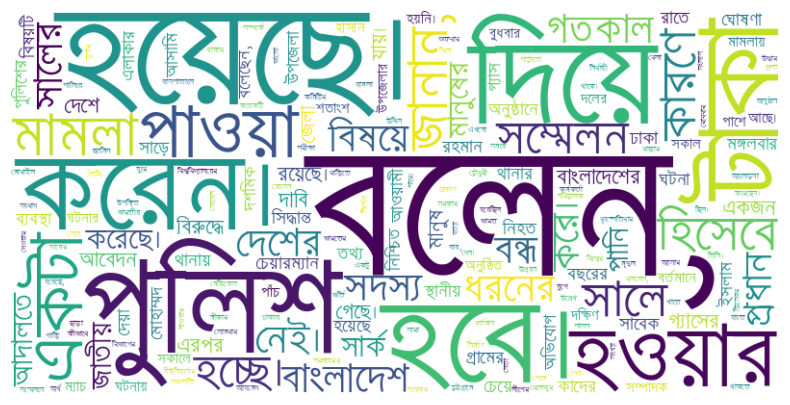

In [59]:
draw_plot(genre_dict["Govt Actions"])

Removing stopword: 100%|██████████| 46324/46324 [00:00<00:00, 175816.04it/s]


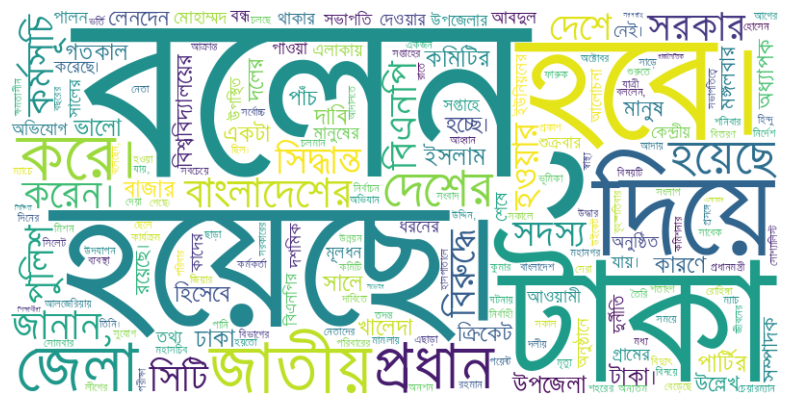

In [60]:
draw_plot(genre_dict["Protests and Social Movements"])